<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/atomgpt_forward_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AtomGPT example: https://pubs.acs.org/doi/10.1021/acs.jpclett.4c01126


# Table of contents

1. Installing [AtomGPT](https://github.com/usnistgov/atomgpt)
2. Train a forward prediction model using AtomGPT
3. Use the model for forward predictions
4. Comapre with [ALIGNN](https://github.com/usnistgov/alignn)

Author: Kamal Choudhary (kamal.choudhary@nist.gov)

Run this block and wait for a few seconds

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


Installation

In [1]:
%%time
import os
os.chdir('/content')
!rm -rf Software
os.makedirs('/content/Software')
os.chdir('/content/Software')
if not os.path.exists('atomgpt'):
  !rm -rf atomgpt
  !git clone https://github.com/usnistgov/atomgpt.git
  os.chdir('atomgpt')
  ! git checkout dev
  !pip install -qqq -r dev-requirements.txt
  !pip install -q protobuf
  !pip install -q -e .
  !git status


Cloning into 'atomgpt'...
remote: Enumerating objects: 616, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 616 (delta 50), reused 50 (delta 22), pack-reused 500 (from 1)
Receiving objects: 100% (616/616), 66.31 MiB | 22.86 MiB/s, done.
Resolving deltas: 100% (285/285), done.
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
!pip install -q jarvis_leaderboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.0/259.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.3 MB/s eta 0:00:00


In [3]:
# Check import
import atomgpt

In [4]:
!jarvis_populate_data.py --benchmark_file AI-SinglePropertyPrediction-exfoliation_energy-dft_3d-test-mae --output_path=Out

benchmark_file AI-SinglePropertyPrediction-exfoliation_energy-dft_3d-test-mae
dataset dft_3d
output_path Out
property exfoliation_energy
method AI
task SinglePropertyPrediction
id_tag jid
out_format poscar
dataset file to be used /usr/local/lib/python3.10/site-packages/jarvis_leaderboard/benchmarks/AI/SinglePropertyPrediction/dft_3d_exfoliation_energy.json.zip
Currently for atomistic datasets only.
https://jarvis-tools.readthedocs.io/en/master/databases.html
Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
100% 40.8M/40.8M [00:03<00:00, 11.1MiB/s]
Loading the zipfile...
Loading completed.
number of training samples 650
number of validation samples 81
number of test samples 81


In [5]:
ls Out/id_prop.csv

Out/id_prop.csv


In [6]:
from jarvis.db.jsonutils import loadjson,dumpjson
dataset_info = loadjson('Out/dataset_info.json')
#print(dataset_info)
n_train = dataset_info['n_train']
n_val = dataset_info['n_val']
n_test = dataset_info['n_test']

In [7]:
# We are using "google/flan-t5-small" because of computational cost, you can also try other models such as "gpt2"
# Try other descs also, desc_1, desc_2 and larger epochs
temp_config = {
    "id_prop_path": "Out/id_prop.csv",
    "prefix": "atomgpt_run",
    "model_name": "google/flan-t5-small",
    "batch_size": 5,
    "max_length": 512,
    "num_epochs": 10,
    "latent_dim": 1024,
    "learning_rate": 0.001,
    "test_each_run": True,
    "include_struct": False,
    "pretrained_path": "",
    "seed_val": 42,
    "n_train": n_train,
    "n_val": n_val,
    "n_test": n_test,
    "output_dir": "atomgpt_out",
    "train_ratio": None,
    "val_ratio": 0.1,
    "test_ratio": 0.1,
    "keep_data_order": True,
    "desc_type": "desc_3",
    "convert":True
}
dumpjson(data=temp_config,filename='atomgpt_config.json')

In [8]:
!pip install -q git+https://github.com/usnistgov/jarvis.git@develop

  Preparing metadata (setup.py) ... done


In [9]:
%%time
!atomgpt_forward --config_name atomgpt_config.json

/usr/local/lib/python3.10/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ('settings_',)`.
  warnings.warn(
Running AtomGPT prop predictor.
PATH /content/Software/atomgpt/atomgpt_
TrainingPropConfig(id_prop_path='Out/id_prop.csv', prefix='atomgpt_run', model_name='google/flan-t5-small', batch_size=5, max_length=512, num_epochs=10, latent_dim=1024, learning_rate=0.001, test_each_run=True, include_struct=False, pretrained_path='', seed_val=42, n_train=650, n_val=81, n_test=81, output_dir='atomgpt_out', desc_type='desc_3', convert=True, train_ratio=None, val_ratio=0.1, test_ratio=0.1, keep_data_order=True)
100% 812/812 [02:12<00:00,  6.14it/s]
len 812
Using rest of the dataset except the test and val sets.
test_texts: 81
val_texts example: CrAgP2S6 crystallizes in the monoclinic P2/c spacegroup.
test_texts example: Ge5

In [11]:
!ls -altr atomgpt_out/

total 238552
-rw-r--r-- 1 root root       568 Oct  4 15:09 config.json
drwxr-xr-x 8 root root      4096 Oct  4 15:09 ..
-rw-r--r-- 1 root root 244240575 Oct  4 15:18 best_model.pt
-rw-r--r-- 1 root root      2027 Oct  4 15:19 val_results.csv
-rw-r--r-- 1 root root       417 Oct  4 15:19 history.json
-rw-r--r-- 1 root root      2031 Oct  4 15:19 test_results.csv
drwxr-xr-x 2 root root      4096 Oct  4 15:19 .
-rw-r--r-- 1 root root      2031 Oct  4 15:19 test_results_final.csv


The test_results.csv can be upload to JARVIS-Leaderboard

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
# temp was the output directory we specified
df = pd.read_csv('atomgpt_out/test_results.csv')
df

,id,target,predictions
0,JVASP-12119,65.55,91.707
1,JVASP-12181,132.96,95.016
2,JVASP-9690,170.78,72.887
3,JVASP-3636,96.39,106.685
4,JVASP-12148,106.02,78.842
...,...,...,...
76,JVASP-12932,48.54,85.806
77,JVASP-5269,221.48,109.641
78,JVASP-12018,57.38,95.014
79,JVASP-231,79.55,98.345


Text(0, 0.5, 'AI Exfo. energy (meV)')

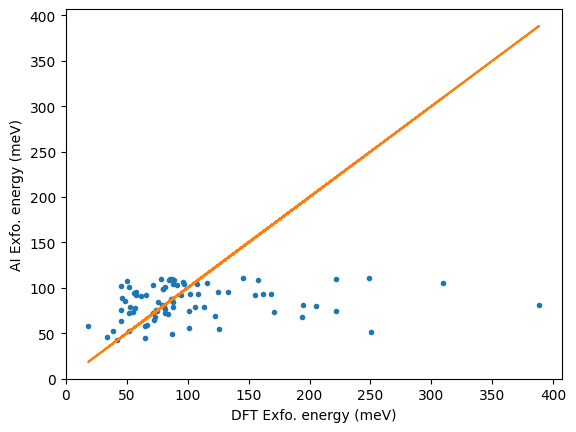

In [13]:
plt.plot(df['target'],df['predictions'],'.')
plt.plot(df['target'],df['target'])
plt.xlabel('DFT Exfo. energy (meV)')
plt.ylabel('AI Exfo. energy (meV)')

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['target'],df['predictions'])

39.927592592592596

Inference on a new material

In [15]:
#Lets load the model first
import transformers, torch, os, json, zipfile
model_name = temp_config['model_name']
output_dir = temp_config['output_dir']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if "t5" in model_name:
    model = transformers.T5ForConditionalGeneration.from_pretrained(
        model_name
    )
else:
    model = transformers.AutoModelForCausalLM.from_pretrained(
        model_name,
        low_cpu_mem_usage=True,
    )

tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({"pad_token": "[PAD]"})
    model.resize_token_embeddings(len(tokenizer))
model.lm_head = torch.nn.Sequential(
    torch.nn.Linear(model.config.hidden_size, temp_config["latent_dim"]),
    torch.nn.Linear(temp_config["latent_dim"], 1),
)
model.load_state_dict(torch.load(output_dir+"/best_model.pt", map_location=device))

/usr/local/lib/python3.10/site-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<All keys matched successfully>

In [16]:
# Get description
from jarvis.io.vasp.inputs import Poscar


pos="""Mo2S4
1.0
1.5957990235943282 -2.764004284915705 0.0
1.5957990235946695 2.7640042849149173 0.0
0.0 0.0 12.47890117404454
Mo S
2 4
Cartesian
1.5958 -0.9213351759999822 3.119725
1.5958 0.9213351759999822 9.359175
1.5958 0.9213351759999822 1.553025569564048
1.5958 -0.9213351759999822 7.792475569561349
1.5958 0.9213351759999822 4.686424430434634
1.5958 -0.9213351759999822 10.92587443043865

"""
atoms=Poscar.from_string(pos).atoms
print(atoms)
desc=atoms.describe()[temp_config['desc_type']]
# desc=atoms.describe()['desc_2']

print(desc)

System
1.0
1.5957990235943282 -2.764004284915705 0.0
1.5957990235946695 2.7640042849149173 0.0
0.0 0.0 12.47890117404454
Mo S 
2 4 
direct
0.6666669999999968 0.3333330000000032 0.25 Mo
0.3333330000000032 0.6666669999999968 0.75 Mo
0.3333330000000032 0.6666669999999968 0.1244521207449413 S
0.6666669999999968 0.3333330000000032 0.624452120744725 S
0.3333330000000032 0.6666669999999968 0.3755478792549531 S
0.6666669999999968 0.3333330000000032 0.8755478792552749 S

MoS2 crystallizes in the hexagonal P6_3/mmc spacegroup.


In [17]:
max_length=512
input_ids = tokenizer(
    [desc],
    return_tensors="pt",
    max_length=max_length,
    padding="max_length",
    truncation=True,
)['input_ids']


input_ids=input_ids.to(device)
model=model.to(device)

if "t5" in model_name:
    predictions = (
        model(
            input_ids,
            decoder_input_ids=input_ids,
        )
        .logits.squeeze()
        .mean(dim=-1)
    )
else:
    predictions = (
        model(
            input_ids.to(device),
        )
        .logits.squeeze()
        .mean(dim=-1)
    )

predictions = predictions.cpu().detach().numpy().tolist()
print(predictions)



103.66924285888672


For similar ALIGNN training see: https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/alignn_jarvis_leaderboard.ipynb

In [18]:
!conda env export

name: base
channels:
  - conda-forge
dependencies:
  - _libgcc_mutex=0.1=conda_forge
  - _openmp_mutex=4.5=2_gnu
  - archspec=0.2.2=pyhd8ed1ab_0
  - boltons=23.1.1=pyhd8ed1ab_0
  - brotli-python=1.1.0=py310hc6cd4ac_1
  - bzip2=1.0.8=hd590300_5
  - c-ares=1.24.0=hd590300_0
  - ca-certificates=2023.11.17=hbcca054_0
  - cffi=1.16.0=py310h2fee648_0
  - charset-normalizer=3.3.2=pyhd8ed1ab_0
  - colorama=0.4.6=pyhd8ed1ab_0
  - conda=23.11.0=py310hff52083_1
  - conda-libmamba-solver=23.12.0=pyhd8ed1ab_0
  - conda-package-handling=2.2.0=pyh38be061_0
  - conda-package-streaming=0.9.0=pyhd8ed1ab_0
  - distro=1.8.0=pyhd8ed1ab_0
  - fmt=10.1.1=h00ab1b0_1
  - icu=73.2=h59595ed_0
  - jsonpatch=1.33=pyhd8ed1ab_0
  - jsonpointer=2.4=py310hff52083_3
  - keyutils=1.6.1=h166bdaf_0
  - krb5=1.21.2=h659d440_0
  - ld_impl_linux-64=2.40=h41732ed_0
  - libarchive=3.7.2=h2aa1ff5_1
  - libcurl=8.5.0=hca28451_0
  - libedit=3.1.20191231=he28a2e2_2
  - libev=4.33=hd590300_2
  - libffi=3.4.2=h7f98852_5
  - libgcc-n

In [19]:
!pip freeze

absl-py==1.4.0
accelerate==0.31.0
aiohttp==3.9.5
aiosignal==1.3.1
alignn==2024.4.20
annotated-types==0.7.0
archspec @ file:///home/conda/feedstock_root/build_artifacts/archspec_1699370045702/work
ase==3.23.0
async-timeout==4.0.3
-e git+https://github.com/usnistgov/atomgpt.git@f24f13be9a6ae6646a9ec932f085234f83999fc4#egg=atomgpt
attrs==23.2.0
autopep8==2.3.1
babel==2.16.0
bitsandbytes==0.43.1
black==24.4.2
boltons @ file:///home/conda/feedstock_root/build_artifacts/boltons_1703154663129/work
Brotli @ file:///home/conda/feedstock_root/build_artifacts/brotli-split_1695989787169/work
certifi==2024.6.2
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1696001684923/work
chardet==3.0.4
charset-normalizer @ file:///home/conda/feedstock_root/build_artifacts/charset-normalizer_1698833585322/work
click==8.1.7
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1666700638685/work
conda @ file:///home/conda/feedstock_root/build_artifacts/conda_1701731572133/work
conda

In [20]:
!conda env export >environment.yml